In [5]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
import signal
import numpy as np

In [6]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [7]:
from pylab import array, plot, show, axis, arange, figure, uint8 

<IPython.core.display.Javascript object>


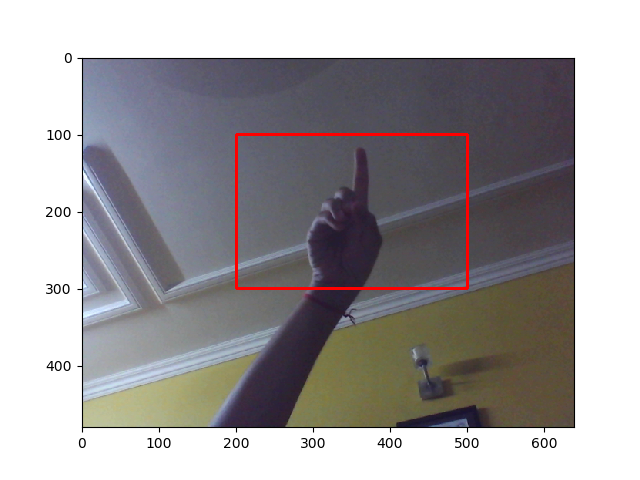

C:\Users\Jain\Anaconda3\envs\tfdeeplearning\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashin

In [8]:
vc = cv2.VideoCapture(0)
plt.ion()
if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # makes the blues image look real colored
    cv2.rectangle(frame, (200, 100), (500, 300), (255,0,0), 2)
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False

while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    cv2.rectangle(frame, (200, 100), (500, 300), (255,0,0), 2)
    webcam_preview.set_data(frame)
    plt.draw()

    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    
    if is_interrupted:
        
        frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        cv2.imwrite("img1.jpg",frame)
        cv2.imwrite("img.jpg",frame[110:290,210:490])
        # Image data
        image = cv2.imread('img.jpg',0) # load as 1-channel 8bit grayscale
        maxIntensity = 255.0 # depends on dtype of image data
        # Parameters for manipulating image data
        phi = 1
        theta = 1
        # Increase intensity such that
        # dark pixels become much brighter, 
        # bright pixels become slightly bright
        newImage0 = (maxIntensity/phi)*(image/(maxIntensity/theta))**0.5
        newImage0 = array(newImage0,dtype=uint8)
        cv2.imwrite('newImage0.jpg',newImage0)
        dim=(28,28)
        resized=cv2.resize(newImage0, dim, interpolation = cv2.INTER_AREA)
        cv2.imwrite('download1.jpg',resized)
        vc.release()
        break